# Lab 7 - Linear Regression Review

A linear relationship between two variables is one in which the scatterplot of them looks roughly like a line.  *Linear regression* is a method for modelling how a *dependent variable* linearly depends on one or more *independent variables*.  The dependent variable (also called a *response variable* and many other things) is what we are trying to model or predict, and is usually denoted $Y$.  The independent variables (also called *explanatory variables*, *input variables*, or *predictors*) are the information we are using to make the prediction, and are usually denoted $X_1, X_2, ...$.

The linear relationship is: $$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n + \epsilon$$
where $\epsilon$ represents the error.

Here $Y, X_1, X_2, ..., X_n$ are *random variables* which is what mathematical variables that can take different values with different probabilities are called.

Linear regression finds the coefficients $\beta_0, \beta_1, ..., \beta_n$ so that the sum of the squares of the error term for each data observation is minimized (as small as possible).

In this lab, we will look at data about health insurance policies, available at: [https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv](https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv)

Each row represents an insurance policy and the 7 columns contain the following information about it:
- age: age of policy holder
- sex: sex of policy holder
- bmi: boday mass index (bmi) of policy holder.  bmi is a (sometimes unreliable) measurement of body fat in adults
- children: number of children (dependents) on the policy
- smoker: whether the policy holder is a smoker
- region: region of the country the policy holder lives in
- charges: price for insurance policy

We will try to model or predict the price of the insurance policy using the other data.  What is the dependent variable?  What are the independent variables?

### Section 1: Loading the data

Import the required packages.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

%matplotlib inline

Load the CSV file into the DataFrame `insurance`, and display it.

In [3]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [23]:
insurance.columns["age","latitude","longitude"]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### Section 2: Exploratory Data Analysis

Is there any missing data?

In [4]:
len(insurance)

1338

In [5]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
insurance.describe(include = ["O"])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


Since there is no missing data, we do not have to drop any of the rows. 

Next, let's look at how the different quantitative variables relate to each other.  Which columns are quantiative variables?

Use `pairplot()` from Seaborn (from Lab 3, Section 5) to plot the histogram of each quantitative variable, and the scatterplot for each pair of quantitative variables.  

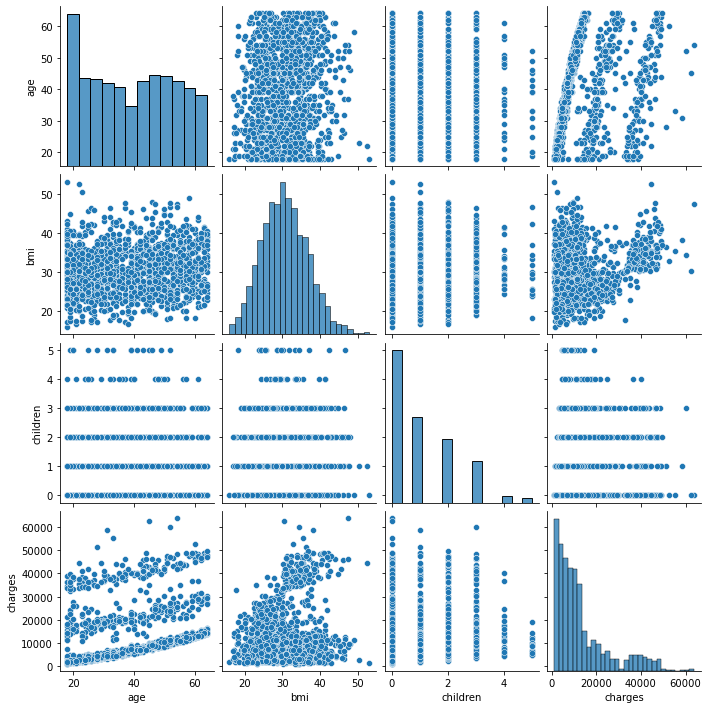

In [7]:
sns.pairplot(data = insurance)

Which quantitative variables are normally distributed?  ([Review of the normal distribution](https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv))

Which pair(s) of variables show a linear relationship?  Do you notice anything else about these plots?

Now let's look at how the insurance charges are affected by the qualitative variables.  For each of the three qualitative variables, plot a boxplot with that variable on the x axis and the charges on the y axis. 

<AxesSubplot:xlabel='sex', ylabel='charges'>

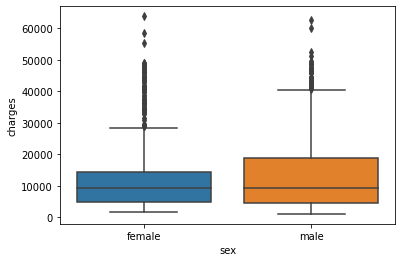

In [8]:
sns.boxplot(x = "sex", y = "charges", data = insurance)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

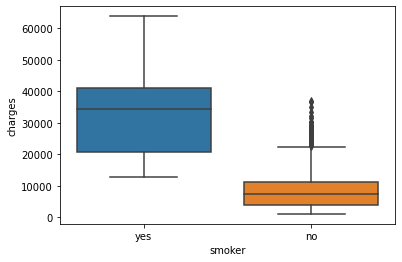

In [9]:
sns.boxplot(x = "smoker", y = "charges", data = insurance)

<AxesSubplot:xlabel='region', ylabel='charges'>

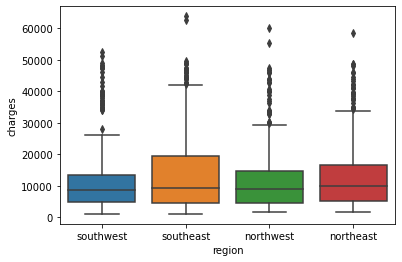

In [10]:
sns.boxplot(x = "region", y = "charges", data = insurance)

What do notice about these plots?  How different are the medians between the different categories in each plot?  Which of these variables do you think influences the health insurance policy charge?

Use Seaborn to plot a scatter plot of age (x) vs. charges (y) colored by whether the person is a smoker or not.

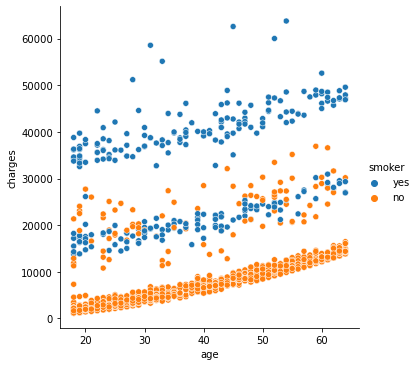

In [11]:
sns.relplot(x = "age", y = "charges", hue = "smoker", data = insurance)

What do you notice about this plot?

### Section 3:  Linear regression

We will learn how to include categorical variables in linear regression in the next lab.  But for this lab, we will just predict health insurance charges using the independent variables age, bmi, and number of children.

The code to set up this linear model and display a summary of it is below.

In [12]:
lm = smf.ols("charges ~ age + bmi + children", data = insurance).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Thu, 04 Mar 2021   Prob (F-statistic):           8.80e-37
Time:                        17:01:07   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6916.2433   1757.480     -3.935      0.000   -1.04e+04   -3468.518
age          239.9945     22.289     10.767      0.000     196.269     283.720
bmi          332.0834     51.310      6.472      0.000     231.425     432.741
children     542.8647    258.241      2.102      0.036      36.261    1049.468
==============================================================================
Omnibus:                      325.395   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.372
Skew:                           1.520   Prob(JB):                    9.54e-132
Kurtosis:                       4.255   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This summary tells us a lot of information.

#### Section 3.1:  Equation of the linear model

Recall the formula for the equation of the linear model for three independent variables is $$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \epsilon$$
where $\epsilon$ represents the error.

Let $X_1$ be the age of the policy holder, $X_2$ be the bmi of the policy holder, and $X_3$ be the number of children the policy holder has.  Let $Y$ be the cost of the insurance policy.

The coefficients $\beta_0, \beta_1, \beta_2, \beta_3$ are shown in the left-most column (named `coef`) of the second section of the summary above. The first row (Intecrcept) corresponds to $\beta_0$, while the other rows are labeled with the variable whose coefficient they are.  Thus:
*$\beta_0 = -6916.2433$
*$\beta_1 = 239.9945$
*$\beta_2 = 332.0834$
*$\beta_3 = 542.8647$

and the equation of the linear model is $$Y = -6916.2433 + 239.9945 X_1 + 332.0834 X_2 + 542.8647 X_3$$


#### Section 3.2: p-values for the coefficients

Look at the column labeled P>|t| in the middle section of the summary, which gives the *p-value* for each coefficient.  The p-value of a coefficient is the probability that we would get that coefficient or one of a larger magnitude (size) if the null hypothesis that that coefficient is equal to zero (no effect) is true.

A small p-value (often less the 0.05) means the coefficient is not really 0 and a large p-value (often 0.05 or greater) means the coefficient could be 0 in the population.  If the coefficient is truly 0, then that independent variable does not have any effect on the dependent variable.

Are any of the p-values 0.05 or greater?  Could any of the coefficients really be 0?


#### Section 3.3: R-squared

*R-squared* is the proportion of variance in the dependent variable (charges) that is explained by the independent variables.  R-squared is between 0 and 1, with closer to 1 being better.

The R-squared value is in the upper right corner of the summary.  What is the R-squared value for this linear model?  Is it good?

#### Section 3.4: Residuals

The residual for each row is the difference between the actual value of the dependent variable (here, the value in the `charges` column) and the value predicted by the linear model.

The mathematical theory of linear regression assumes the residuals have a normal distribution centered at 0, so we should check that this assumption is true.  It is usually ok if the distribution is not perfectly normal, but it should look somewhat normal (ex. roughly symmetric with one peak near 0).

The residuals are stored as a Pandas Series (column) in `lm.resid`.  Display them.

In [13]:
lm.resid

0        9976.146467
1       -7435.424761
2       -7941.484918
3       13440.943515
4       -6487.292196
            ...     
1333    -6396.147822
1334    -5797.777384
1335    -8011.095671
1336    -4683.446417
1337    11764.277310
Length: 1338, dtype: float64

Now plot the residuals as a histogram.

<AxesSubplot:>

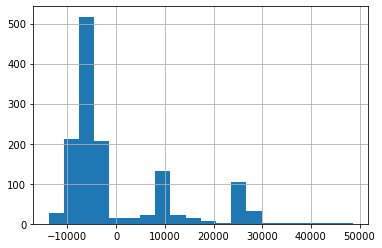

In [14]:
lm.resid.hist(bins = 20)

Do the residuals have a normal distribution centered at 0?  (You may want to increase the number of bins.)

No!  In fact, 0 is one of the low probability points in the distribution of the residuals.  However, the peak to the left of 0 does look more normally distributed.

What could be happening here?  We can try making a scatterplot of the dependent variable value (x axis) vs. the residual.  Because the residuals are not part of the DataFrame `insurance` we have to either use the Matplotlib scatter plot function (shown below), or add the residuals to our DataFrame as a new column.

Text(0, 0.5, 'Residuals')

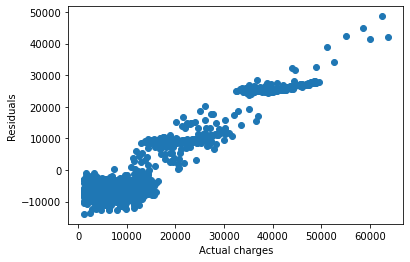

In [15]:
plt.scatter(x = insurance["charges"], y = lm.resid)
plt.xlabel("Actual charges")
plt.ylabel("Residuals")

Ideally, the residuals should be centered around 0 on the y axis, but we can see this is not the case.  In fact, the lower charges have negative residuals, meaning they are being over-estimated (since *residual = actual charge - predicted charge*), while the higher charges have positive residuals, meaning they are being under-estimated.

Unfortunately, we cannot graph the full linear model, since we would need 4 dimensions (1 dimension for $Y$ and 1 dimension for each of the 3 independent variables).  However, let's use Seaborn to plot the linear model with the insurance policy cost as the dependent variable and age as the independent variable.

<AxesSubplot:xlabel='age', ylabel='charges'>

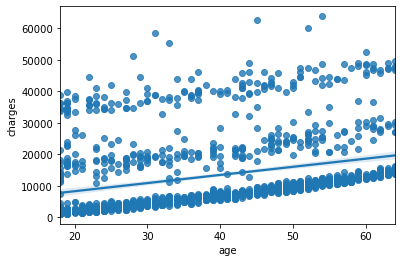

In [16]:
sns.regplot(x = "age", y = "charges", data = insurance)

The line is the linear model in this case.  Which charges are being over-estimated by the model?  Which charges are being under-estimated by the model?  In the next lab, we will see how to improve our model by adding in categorical data, such as whether the policy holder smokes.


### Section 4: Using linear regression to make predictions

Recall that the equation of our linear model is $$Y = -6916.2433 + 239.9945 X_1 + 332.0834 X_2 + 542.8647 X_3$$ where $X_1$ is the age of the policy holder, $X_2$ is the bmi of the policy holder, and $X_3$ is the number of children the policy holder has.  $Y$ is the cost of the insurance policy.

If a policy holder becomes one year older, how much will their insurance policy increase by, according to this model?  Assume the policy holder's bmi and number of children remain the same.

Since $X_1$ is the age variable, if it increases by 1, then according to the linear equation, we will be adding an extra \$239.99 to $Y$.  Thus, when a policy holder ages by one year, our model predict their insurance increases by \$239.99.

Suppose a policy holder has another kid.  Assuming their age and bmi remain the same, how much does our model predict their insurance policy cost will increase by?

<details><summary>Answer:</summary>
\$542.86
</details>

We can also use our model to predict the insurance cost for a new policy holder.  For example, suppose a person is 36 years old, with 1 child, and a bmi of 24.3.  What is their insurance cost?

First, create a DataFrame with this information.

In [17]:
person_df = pd.DataFrame({"age":[36], "children":[1], "bmi":[24.3]})
person_df

,age,children,bmi
0,36,1,24.3


Now use our linear model `lm` to make the prediction:

In [18]:
lm.predict(person_df)

0    10336.048136
dtype: float64

Therefore, our model predicts this person will pay \$10,336.05 for their health insurance policy.  What does the model predict a person age 54 with 3 children and a bmi of 26.1 will pay?

In [21]:
person_df_2 = pd.DataFrame({"age":[54,20], "children":[3,0], "bmi":[26.1,22]})
person_df_2

,age,children,bmi
0,54,3,26.1
1,20,0,22.0


In [22]:
lm.predict(person_df_2)

0    16339.428034
1     5189.480157
dtype: float64